# Прогнозирование временных рядов

In [1]:
import pandas as pd
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
ZX_df = pd.read_csv('data/less4/lect/ZX10208_agr.csv')
ZX_df['dates'] = pd.to_datetime(ZX_df.dates)
pivot_t = ZX_df.pivot_table(index='dates', columns='SKU', values='price_per_sku')

<Axes: xlabel='dates'>

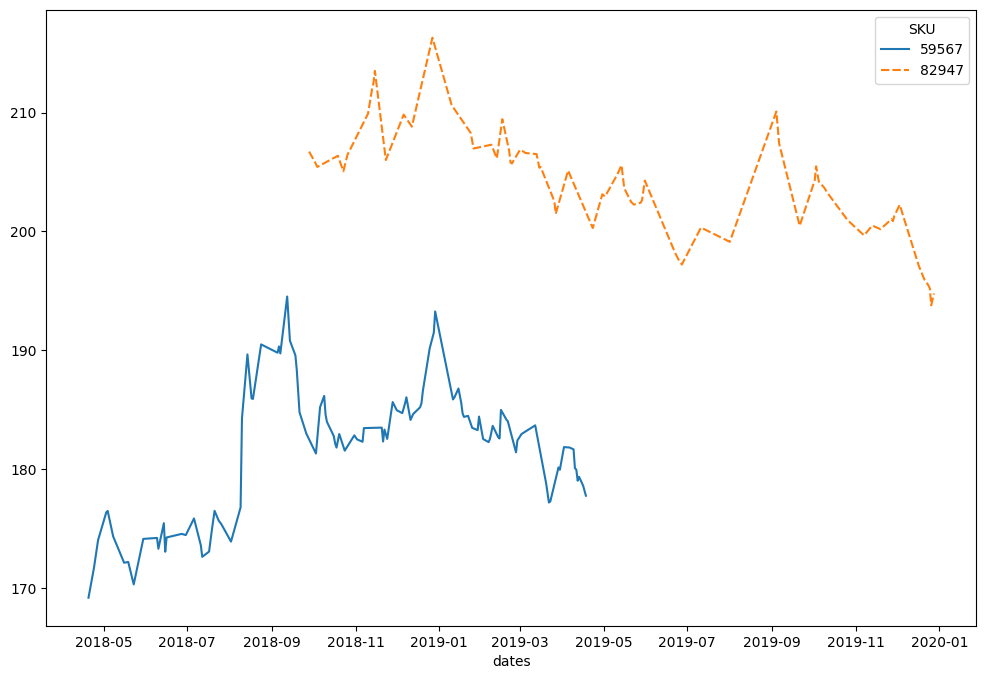

In [3]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=pivot_t)

In [4]:
ZX_df['price_per_sku'] = ZX_df.groupby('SKU').price_per_sku.ffill()

In [5]:
df_59567 = ZX_df[ZX_df.SKU==59567]

In [6]:
train_df = df_59567[df_59567.dates <= pd.to_datetime('2019-04-01')]
test_df = df_59567[df_59567.dates > pd.to_datetime('2019-04-01')]

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

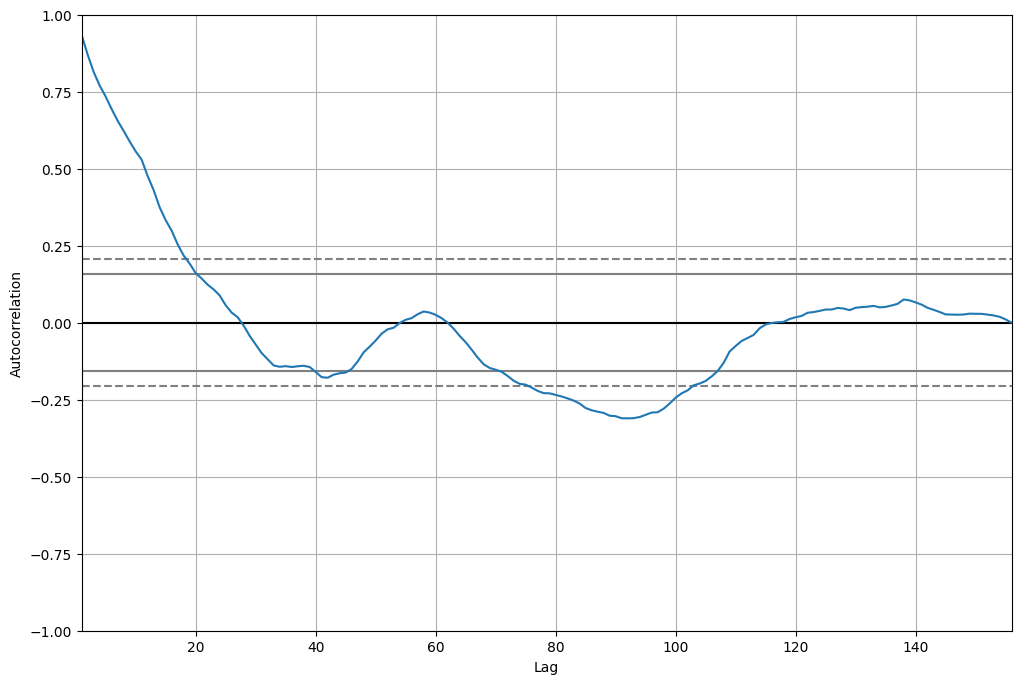

In [7]:
plt.figure(figsize=(12, 8))
autocorrelation_plot(df_59567.price_per_sku.values)

In [8]:
# Aurotegression
AR = AutoReg(train_df.price_per_sku.values, lags=20)
AR_model = AR.fit()

In [9]:
AR_model.params

array([ 1.60820207e+01,  1.06938563e+00, -1.46162089e-01, -1.30899380e-01,
        1.57571721e-01,  6.47218415e-02, -1.11758222e-01,  5.59600227e-02,
       -3.76933446e-02,  1.47311386e-02, -6.18697944e-02,  2.73159049e-01,
       -3.18091136e-01,  1.60588852e-01, -7.09107645e-02, -6.92044450e-02,
        1.41846291e-01, -1.33862976e-01,  4.72945316e-02,  4.09616542e-02,
       -3.34062939e-02])

In [10]:
AR_model.predict(start=len(train_df), end=len(train_df)+len(test_df)-1, dynamic=False)

array([180.44857402, 180.4443652 , 180.87926656, 181.70071796,
       180.70814628, 181.08981343, 181.11552473, 181.10372658,
       182.38490989, 182.0267328 , 182.55686698])

In [11]:
test_df['AR_model_prediction'] = AR_model.predict(start=len(train_df), end=len(train_df)+len(test_df)-1, dynamic=False)

In [12]:
test_df

,dates,SKU,price_per_sku,num_purchases,AR_model_prediction
192,2019-04-02,59567,181.86,2,180.448574
194,2019-04-06,59567,181.83,2,180.444365
195,2019-04-08,59567,181.83,1,180.879267
196,2019-04-09,59567,181.67,1,181.700718
197,2019-04-10,59567,180.08,2,180.708146
198,2019-04-11,59567,179.97,2,181.089813
199,2019-04-12,59567,179.03,1,181.115525
200,2019-04-13,59567,179.36,1,181.103727
202,2019-04-16,59567,178.61,2,182.384910
203,2019-04-18,59567,177.77,1,182.026733


In [13]:
# Moving average
MA = ARIMA(train_df.price_per_sku.values, order=(0, 0, 20))
MA_model = MA.fit()

In [14]:
MA_model.predict(start=len(train_df), end=len(train_df)+len(test_df)-1)

array([181.1412524 , 180.97156667, 181.7848665 , 182.45946812,
       181.10414052, 181.8962279 , 181.05873885, 181.75459071,
       182.56194315, 181.31067772, 182.60957098])

In [15]:
test_df['MA_model_prediction'] = MA_model.predict(start=len(train_df), end=len(train_df)+len(test_df)-1)

In [16]:
test_df

,dates,SKU,price_per_sku,num_purchases,AR_model_prediction,MA_model_prediction
192,2019-04-02,59567,181.86,2,180.448574,181.141252
194,2019-04-06,59567,181.83,2,180.444365,180.971567
195,2019-04-08,59567,181.83,1,180.879267,181.784866
196,2019-04-09,59567,181.67,1,181.700718,182.459468
197,2019-04-10,59567,180.08,2,180.708146,181.104141
198,2019-04-11,59567,179.97,2,181.089813,181.896228
199,2019-04-12,59567,179.03,1,181.115525,181.058739
200,2019-04-13,59567,179.36,1,181.103727,181.754591
202,2019-04-16,59567,178.61,2,182.384910,182.561943
203,2019-04-18,59567,177.77,1,182.026733,181.310678


In [17]:
# Autoregressive moving average(ARMA)
ARMA = ARIMA(train_df.price_per_sku.values, order=(1, 0, 1))
ARMA_model = ARMA.fit()

In [18]:
ARMA_model.predict(start=len(train_df), end=len(train_df)+len(test_df)-1)

array([179.97184905, 179.9823484 , 179.99237896, 180.00196166,
       180.01111649, 180.01986256, 180.02821812, 180.03620061,
       180.04382668, 180.05111225, 180.05807252])

In [19]:
test_df['ARMA_model_prediction'] = ARMA_model.predict(start=len(train_df), end=len(train_df)+len(test_df)-1)

In [20]:
test_df

,dates,SKU,price_per_sku,num_purchases,AR_model_prediction,MA_model_prediction,ARMA_model_prediction
192,2019-04-02,59567,181.86,2,180.448574,181.141252,179.971849
194,2019-04-06,59567,181.83,2,180.444365,180.971567,179.982348
195,2019-04-08,59567,181.83,1,180.879267,181.784866,179.992379
196,2019-04-09,59567,181.67,1,181.700718,182.459468,180.001962
197,2019-04-10,59567,180.08,2,180.708146,181.104141,180.011116
198,2019-04-11,59567,179.97,2,181.089813,181.896228,180.019863
199,2019-04-12,59567,179.03,1,181.115525,181.058739,180.028218
200,2019-04-13,59567,179.36,1,181.103727,181.754591,180.036201
202,2019-04-16,59567,178.61,2,182.384910,182.561943,180.043827
203,2019-04-18,59567,177.77,1,182.026733,181.310678,180.051112


In [21]:
# Autoregressive intrgrating moving average(ARIMA)
ARIMA = ARIMA(train_df.price_per_sku.values, order=(20, 1, 20))
ARIMA_model = ARIMA.fit()

In [22]:
ARIMA_model.predict(start=len(train_df), end=len(train_df)+len(test_df)-1)

array([180.83506299, 180.48024538, 180.31534585, 181.1097425 ,
       178.69452883, 179.13730604, 177.74931258, 177.77368699,
       179.94603092, 178.96454944, 180.37264351])

In [23]:
test_df['ARIMA_model_prediction'] = ARIMA_model.predict(start=len(train_df), end=len(train_df)+len(test_df)-1)

In [24]:
test_df

,dates,SKU,price_per_sku,num_purchases,AR_model_prediction,MA_model_prediction,ARMA_model_prediction,ARIMA_model_prediction
192,2019-04-02,59567,181.86,2,180.448574,181.141252,179.971849,180.835063
194,2019-04-06,59567,181.83,2,180.444365,180.971567,179.982348,180.480245
195,2019-04-08,59567,181.83,1,180.879267,181.784866,179.992379,180.315346
196,2019-04-09,59567,181.67,1,181.700718,182.459468,180.001962,181.109742
197,2019-04-10,59567,180.08,2,180.708146,181.104141,180.011116,178.694529
198,2019-04-11,59567,179.97,2,181.089813,181.896228,180.019863,179.137306
199,2019-04-12,59567,179.03,1,181.115525,181.058739,180.028218,177.749313
200,2019-04-13,59567,179.36,1,181.103727,181.754591,180.036201,177.773687
202,2019-04-16,59567,178.61,2,182.384910,182.561943,180.043827,179.946031
203,2019-04-18,59567,177.77,1,182.026733,181.310678,180.051112,178.964549


In [25]:
# Seasonable autoregressive intrgrating moving average(SARIMA)
SARIMA = SARIMAX(train_df.price_per_sku.values, order=(20, 1, 20), seasonal=(0, 0, 0, 0))
SARIMA_model = SARIMA.fit()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           41     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.19157D+00    |proj g|=  1.13176D+00

At iterate    5    f=  1.88456D+00    |proj g|=  3.07226D-02

At iterate   10    f=  1.85008D+00    |proj g|=  6.17458D-02

At iterate   15    f=  1.83162D+00    |proj g|=  7.11524D-02

At iterate   20    f=  1.81659D+00    |proj g|=  4.81315D-02

At iterate   25    f=  1.81231D+00    |proj g|=  3.38191D-02

At iterate   30    f=  1.80791D+00    |proj g|=  2.44675D-02

At iterate   35    f=  1.80455D+00    |proj g|=  1.74837D-02

At iterate   40    f=  1.80296D+00    |proj g|=  1.96899D-02

At iterate   45    f=  1.80132D+00    |proj g|=  1.72269D-02

At iterate   50    f=  1.80017D+00    |proj g|=  1.49312D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

In [26]:
SARIMA_model.predict(start=len(train_df), end=len(train_df)+len(test_df)-1)

array([180.83506299, 180.48024538, 180.31534585, 181.1097425 ,
       178.69452883, 179.13730604, 177.74931258, 177.77368699,
       179.94603092, 178.96454944, 180.37264351])

In [27]:
test_df['SARIMA_model_prediction'] = SARIMA_model.predict(start=len(train_df), end=len(train_df)+len(test_df)-1)

In [28]:
test_df

,dates,SKU,price_per_sku,num_purchases,AR_model_prediction,MA_model_prediction,ARMA_model_prediction,ARIMA_model_prediction,SARIMA_model_prediction
192,2019-04-02,59567,181.86,2,180.448574,181.141252,179.971849,180.835063,180.835063
194,2019-04-06,59567,181.83,2,180.444365,180.971567,179.982348,180.480245,180.480245
195,2019-04-08,59567,181.83,1,180.879267,181.784866,179.992379,180.315346,180.315346
196,2019-04-09,59567,181.67,1,181.700718,182.459468,180.001962,181.109742,181.109742
197,2019-04-10,59567,180.08,2,180.708146,181.104141,180.011116,178.694529,178.694529
198,2019-04-11,59567,179.97,2,181.089813,181.896228,180.019863,179.137306,179.137306
199,2019-04-12,59567,179.03,1,181.115525,181.058739,180.028218,177.749313,177.749313
200,2019-04-13,59567,179.36,1,181.103727,181.754591,180.036201,177.773687,177.773687
202,2019-04-16,59567,178.61,2,182.384910,182.561943,180.043827,179.946031,179.946031
203,2019-04-18,59567,177.77,1,182.026733,181.310678,180.051112,178.964549,178.964549


In [29]:
# Simple Exponential Smoothing
SES = SimpleExpSmoothing(train_df.price_per_sku.values)
SES_model = SES.fit()

In [30]:
SES_model.predict(start=len(train_df), end=len(train_df)+len(test_df)-1)

array([179.96, 179.96, 179.96, 179.96, 179.96, 179.96, 179.96, 179.96,
       179.96, 179.96, 179.96])

In [31]:
test_df['SES_model_prediction'] = SES_model.predict(start=len(train_df), end=len(train_df)+len(test_df)-1)

In [32]:
test_df

,dates,SKU,price_per_sku,num_purchases,AR_model_prediction,MA_model_prediction,ARMA_model_prediction,ARIMA_model_prediction,SARIMA_model_prediction,SES_model_prediction
192,2019-04-02,59567,181.86,2,180.448574,181.141252,179.971849,180.835063,180.835063,179.96
194,2019-04-06,59567,181.83,2,180.444365,180.971567,179.982348,180.480245,180.480245,179.96
195,2019-04-08,59567,181.83,1,180.879267,181.784866,179.992379,180.315346,180.315346,179.96
196,2019-04-09,59567,181.67,1,181.700718,182.459468,180.001962,181.109742,181.109742,179.96
197,2019-04-10,59567,180.08,2,180.708146,181.104141,180.011116,178.694529,178.694529,179.96
198,2019-04-11,59567,179.97,2,181.089813,181.896228,180.019863,179.137306,179.137306,179.96
199,2019-04-12,59567,179.03,1,181.115525,181.058739,180.028218,177.749313,177.749313,179.96
200,2019-04-13,59567,179.36,1,181.103727,181.754591,180.036201,177.773687,177.773687,179.96
202,2019-04-16,59567,178.61,2,182.384910,182.561943,180.043827,179.946031,179.946031,179.96
203,2019-04-18,59567,177.77,1,182.026733,181.310678,180.051112,178.964549,178.964549,179.96


# VAR
# VARMA
# VARMAX

In [33]:
import torch
from torch import nn
from torch.autograd import Variable as V
from torch import optim
import torchvision as tv
import torchvision.transforms as tf

In [34]:
class LSTM(nn.Module):
    def __init__(self, input_size=1, hidden_size=100, output_size=1):
        super().__init__()
        self.hidden_size = hidden_size
        
        self.lstm = nn.LSTM(input_size, hidden_size)
        
        self.linear = nn.Linear(hidden_size, output_size)
        
        self.hidden_cell = (torch.zeros(1, 1, self.hidden_size),
                            torch.zeros(1, 1, self.hidden_size))

    def forward(self, input_seq):
        lstm_out, self.hidden_cell = self.lstm(input_seq.view(len(input_seq), 1, -1), self.hidden_cell)
        predictions = self.linear(lstm_out.view(len(input_seq), -1))
        return predictions[-1]

In [35]:
model = LSTM()
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=.001)

In [36]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
train_data_normalized = scaler.fit_transform(train_df.price_per_sku.values .reshape(-1, 1))

In [37]:
train_data_normalized = torch.FloatTensor(train_data_normalized).view(-1)
train_data_normalized

tensor([-1.0000, -0.8011, -0.6172, -0.6172, -0.4325, -0.4238, -0.4238, -0.4238,
        -0.5927, -0.5927, -0.5927, -0.7680, -0.7624, -0.9116, -0.6093, -0.6030,
        -0.6748, -0.6748, -0.5051, -0.6946, -0.5998, -0.5998, -0.5762, -0.5841,
        -0.5841, -0.4736, -0.4736, -0.6527, -0.7285, -0.7285, -0.6938, -0.5525,
        -0.4230, -0.4230, -0.4878, -0.5122, -0.5122, -0.5122, -0.6275, -0.6275,
        -0.4002,  0.1902,  0.6156,  0.3236,  0.3197,  0.3197,  0.6819,  0.6819,
         0.6267,  0.6685,  0.6219,  0.6219,  0.6219,  1.0000,  0.7064,  0.7064,
         0.6093,  0.5122,  0.2313,  0.2313,  0.2313,  0.0892,  0.0892, -0.0426,
         0.2652,  0.2652,  0.3402,  0.2163,  0.1681,  0.1681,  0.0734,  0.0245,
        -0.0032,  0.0868,  0.0868, -0.0237,  0.0781,  0.0513,  0.0513,  0.0355,
         0.1263,  0.1263,  0.1263,  0.1294,  0.0371,  0.1168,  0.0545,  0.0545,
         0.0545,  0.2391,  0.2991,  0.2447,  0.2257,  0.2897,  0.3307,  0.3307,
         0.1807,  0.2202,  0.2202,  0.26

In [38]:
def create_input_sequences(input_data, tw=11):
    inout_seq = []
    L = len(input_data)
    for i in range(L - tw):
        train_seq = input_data[i:i+tw]
        train_label = input_data[i+tw:i+tw+1]
        inout_seq.append((train_seq, train_label))
    return inout_seq

In [39]:
train_inout_seq = create_input_sequences(train_data_normalized, tw=11) # tw - time window 11 elements

In [40]:
train_inout_seq

[(tensor([-1.0000, -0.8011, -0.6172, -0.6172, -0.4325, -0.4238, -0.4238, -0.4238,
          -0.5927, -0.5927, -0.5927]),
  tensor([-0.7680])),
 (tensor([-0.8011, -0.6172, -0.6172, -0.4325, -0.4238, -0.4238, -0.4238, -0.5927,
          -0.5927, -0.5927, -0.7680]),
  tensor([-0.7624])),
 (tensor([-0.6172, -0.6172, -0.4325, -0.4238, -0.4238, -0.4238, -0.5927, -0.5927,
          -0.5927, -0.7680, -0.7624]),
  tensor([-0.9116])),
 (tensor([-0.6172, -0.4325, -0.4238, -0.4238, -0.4238, -0.5927, -0.5927, -0.5927,
          -0.7680, -0.7624, -0.9116]),
  tensor([-0.6093])),
 (tensor([-0.4325, -0.4238, -0.4238, -0.4238, -0.5927, -0.5927, -0.5927, -0.7680,
          -0.7624, -0.9116, -0.6093]),
  tensor([-0.6030])),
 (tensor([-0.4238, -0.4238, -0.4238, -0.5927, -0.5927, -0.5927, -0.7680, -0.7624,
          -0.9116, -0.6093, -0.6030]),
  tensor([-0.6748])),
 (tensor([-0.4238, -0.4238, -0.5927, -0.5927, -0.5927, -0.7680, -0.7624, -0.9116,
          -0.6093, -0.6030, -0.6748]),
  tensor([-0.6748])),

In [42]:
test_inputs = train_data_normalized[-11:].tolist()
test_inputs

[0.0441988967359066,
 0.08681926131248474,
 0.08681926131248474,
 0.14443567395210266,
 -0.2415153980255127,
 -0.36779794096946716,
 -0.3614838123321533,
 -0.3614838123321533,
 -0.1349644809961319,
 -0.14996053278446198,
 -0.14996053278446198]

In [43]:
model.eval()

for i in range(11):
    seq = torch.FloatTensor(test_inputs[-11:])
    with torch.no_grad():
        model.hidden = (torch.zeros(1, 1, model.hidden_size),
                        torch.zeros(1, 1, model.hidden_size))
        test_inputs.append(model(seq).item())

In [44]:
test_inputs[11:]

[-0.16666953265666962,
 -0.13405780494213104,
 -0.11534637212753296,
 -0.11426177620887756,
 -0.11262758076190948,
 -0.1114293783903122,
 -0.11350825428962708,
 -0.119818776845932,
 -0.12162795662879944,
 -0.11874723434448242,
 -0.11440123617649078]

https://machinelearningmastery.com/grid-search-arima-hyperparameters-with-python/ <br>
https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/